In [2]:
import pandas as pd  # 数据分析库
from snownlp import SnowNLP  # 中文情感分析库
from wordcloud import WordCloud  # 绘制词云图
from pprint import pprint  # 美观打印
import jieba.analyse  # jieba分词
from PIL import Image  # 读取图片
import numpy as np  # 将图片的像素点转换成矩阵数据

In [6]:
# 情感分析打标
def sentiment_analyse(v_cmt_list):
    """
    情感分析打分
    :param v_cmt_list: 需要处理的评论列表
    :return:
    """
    score_list = []  # 情感评分值
    for comment in v_cmt_list:
        sentiments_score = SnowNLP(comment).sentiments
        score_list.append(sentiments_score)  # 得分值
    return score_list 
    

In [7]:
df = pd.read_csv('三国演义弹幕1.csv')
comment_list = df['弹幕内容']
scores = sentiment_analyse(comment_list)
df['情感得分'] = scores


In [8]:
df.to_excel('三国演义弹幕.xlsx')


In [3]:
df_words = pd.read_csv('node.csv',encoding='gbk')
df_words = df_words[df_words['Weight']>9]
df_words = df_words[df_words['Label'].notnull()]
df_words.to_csv('booknode_important.csv',index=False)

In [4]:
df_edges = pd.read_csv('edge.csv',encoding='gbk')
df_edges = df_edges[df_edges['Weight']>6]
df_edges.to_csv('bookedge_important.csv',index=False)

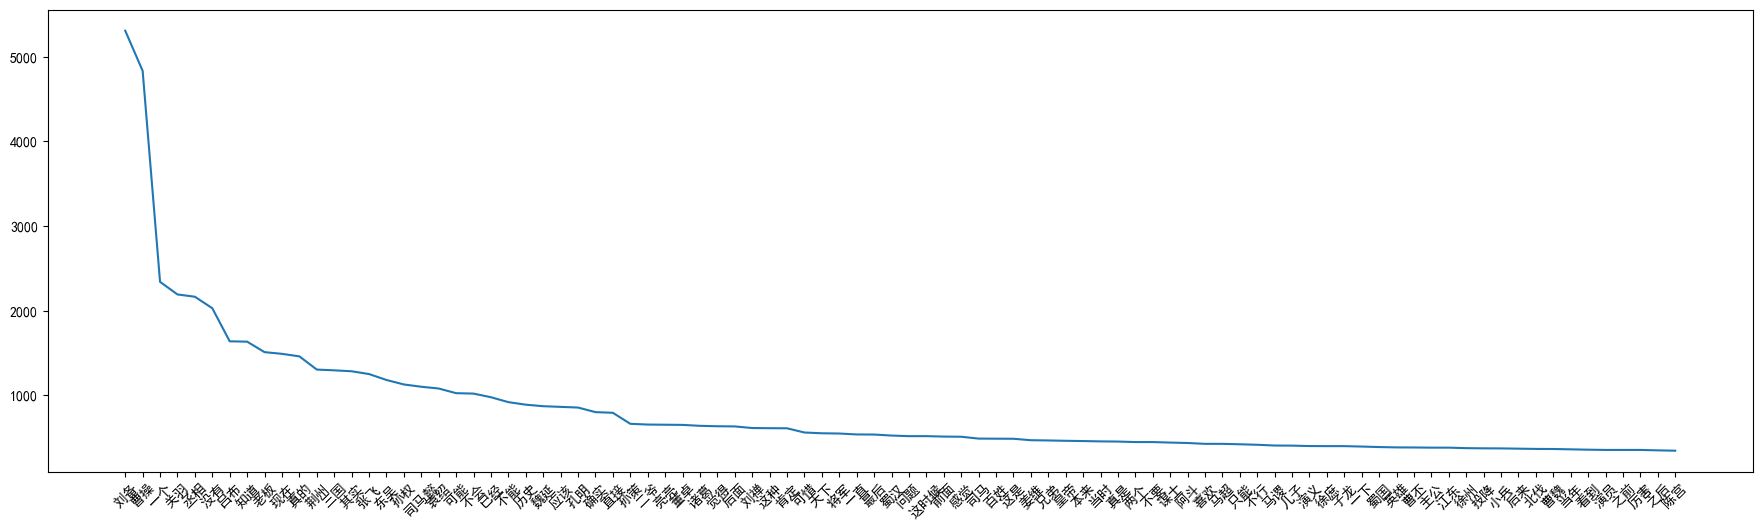

In [29]:
import matplotlib.pyplot as plt
# 设置中文字体，'SimHei' 是黑体，如果没有该字体，可以更换为其他中文字体
plt.figure(figsize=(22, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题
plt.xticks(rotation=45)
plt.plot(df_words['Label'][0:90],df_words['Weight'][0:90])

In [32]:
node = pd.read_csv('node.csv',encoding='gbk')
node_new = node[node['Weight']>10]
node_new.to_csv('node_new.csv')